**Emlak datasetini lineer regresyonla modelleyin ve metriklerini oluşturun (ölçekli ve ölçeksiz)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Emlak_limitli_sutun.csv")
df

,SalePrice,Garage Cars,Gr Liv Area,Overall Qual,Year Built,Lot Area
0,215000,2.0,1656,6,1960,31770
1,105000,1.0,896,5,1961,11622
2,172000,1.0,1329,6,1958,14267
3,244000,2.0,2110,7,1968,11160
4,189900,2.0,1629,5,1997,13830
...,...,...,...,...,...,...
2920,142500,2.0,1003,6,1984,7937
2921,131000,2.0,902,5,1983,8885
2922,132000,0.0,970,5,1992,10441
2923,170000,2.0,1389,5,1974,10010


In [ ]:
df.info()  # Keşifsel veri analizi yapıp veriyi anlamaya çalışıyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     2925 non-null   int64  
 1   Garage Cars   2925 non-null   float64
 2   Gr Liv Area   2925 non-null   int64  
 3   Overall Qual  2925 non-null   int64  
 4   Year Built    2925 non-null   int64  
 5   Lot Area      2925 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 137.2 KB


In [ ]:
df.isnull().sum()

,0
SalePrice,0
Garage Cars,0
Gr Liv Area,0
Overall Qual,0
Year Built,0
Lot Area,0


In [ ]:
df.corr()["SalePrice"].sort_values()

,SalePrice
Lot Area,0.270507
Year Built,0.559165
Garage Cars,0.648488
Gr Liv Area,0.727279
Overall Qual,0.802637
SalePrice,1.000000


<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

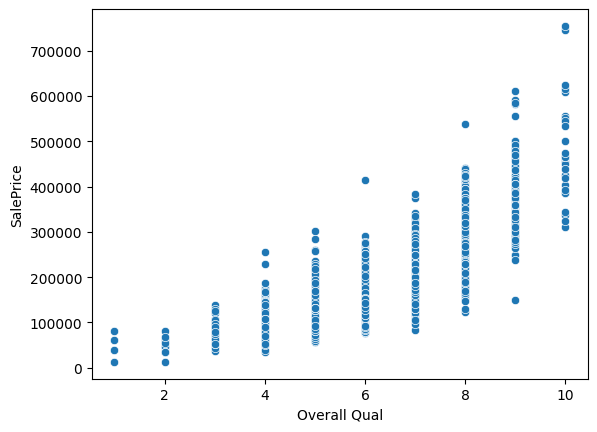

In [ ]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [ ]:
df[(df["Overall Qual"]>9) & (df["SalePrice"]>650000)]

,SalePrice,Garage Cars,Gr Liv Area,Overall Qual,Year Built,Lot Area
1758,745000,3.0,4476,10,1996,15623
1765,755000,3.0,4316,10,1994,21535


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

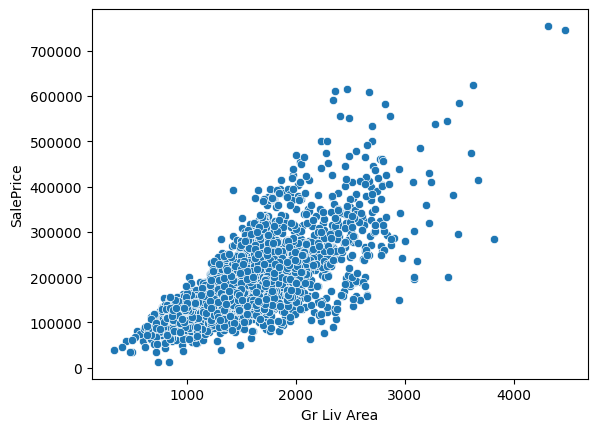

In [ ]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [ ]:
df[(df["Gr Liv Area"]>4000) & (df["SalePrice"]>650000)]

,SalePrice,Garage Cars,Gr Liv Area,Overall Qual,Year Built,Lot Area
1758,745000,3.0,4476,10,1996,15623
1765,755000,3.0,4316,10,1994,21535


In [ ]:
ind_drop=df[(df["Gr Liv Area"]>4000) & (df["SalePrice"]>650000)].index
df=df.drop(ind_drop,axis=0)
df  # Outlier veri temizliği.

,SalePrice,Garage Cars,Gr Liv Area,Overall Qual,Year Built,Lot Area
0,215000,2.0,1656,6,1960,31770
1,105000,1.0,896,5,1961,11622
2,172000,1.0,1329,6,1958,14267
3,244000,2.0,2110,7,1968,11160
4,189900,2.0,1629,5,1997,13830
...,...,...,...,...,...,...
2920,142500,2.0,1003,6,1984,7937
2921,131000,2.0,902,5,1983,8885
2922,132000,0.0,970,5,1992,10441
2923,170000,2.0,1389,5,1974,10010


<Axes: xlabel='Overall Qual', ylabel='Gr Liv Area'>

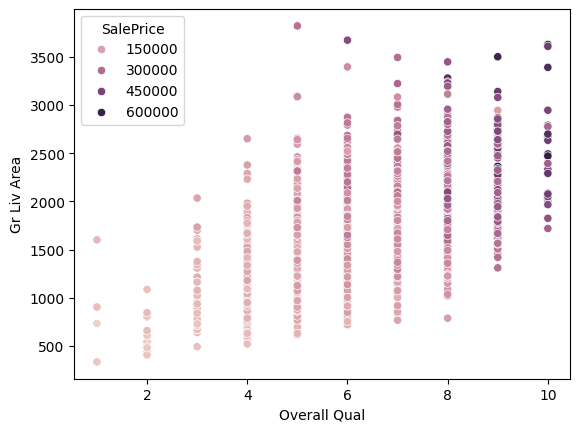

In [ ]:
sns.scatterplot(x='Overall Qual',y='Gr Liv Area',data=df,hue='SalePrice')

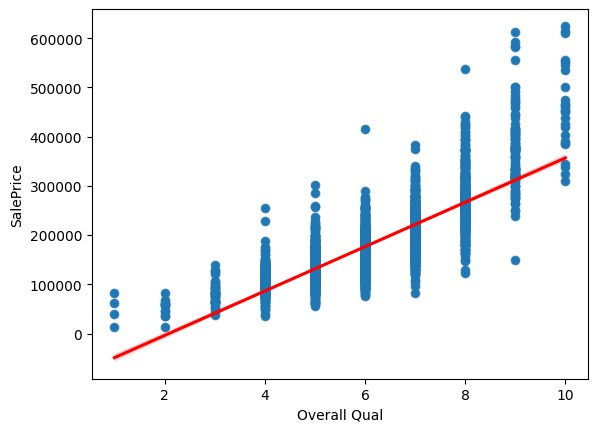

In [ ]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)
sns.regplot(x="Overall Qual", y="SalePrice", data=df,line_kws={"color": "red"})
plt.show()

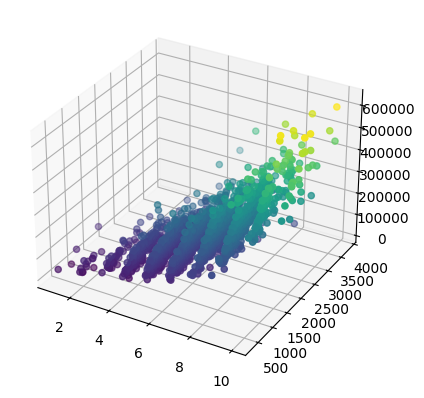

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Overall Qual'],df['Gr Liv Area'],df['SalePrice'],c=df['SalePrice'])

<Axes: >

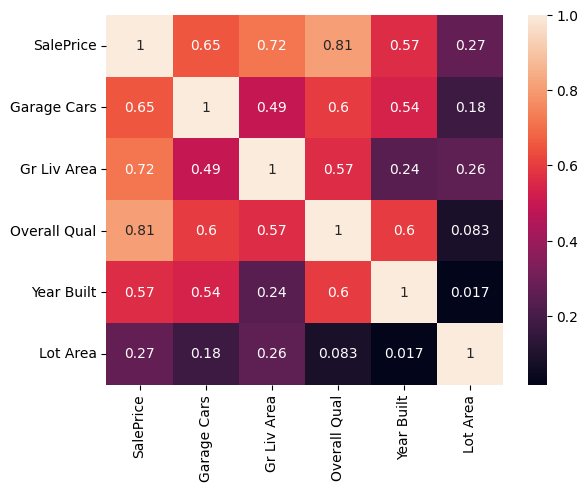

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.to_csv("final_Emlak_limitli_sutun.csv", index=True)

In [ ]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=56)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([151890.22567609, 134817.99203908, 113863.87930736, 157361.6052106 ,
       201530.13262651, 150390.92494779, 145418.08066446, 134974.72689342,
       262984.96866927, 209271.20027704, 225257.54980571, 132668.81982109,
       138641.85356133, 328261.38686805, 148389.99153815, 247801.52762123,
       140485.56364515,  90782.10315122, 191175.53313986, 160296.30369874,
       182908.40031282, 203930.69724908, 152395.78823062, 198744.93833649,
       149783.55596894, 225758.62396889, 113847.10129505, 131932.48408573,
        38119.48535962, 135658.05561483, 146982.37246157, 152857.53484494,
       137401.71020973, 147805.23405212, 163961.56873867, 195559.34128485,
       232591.62318689, 211705.64068993,  82211.52294007, 282371.73616231,
       114136.33394013, 210761.34847343, 115717.9737452 ,  85940.08167408,
       150390.92494779, 190605.09337335, 293081.19730096, 279440.33895929,
       174410.28699097, 210818.44485732, 162508.64959878, 168800.46923124,
       132277.00745971, 1

In [ ]:
y.mean()

np.float64(180426.08518645228)

In [ ]:
model.intercept_

np.float64(-898994.4558130695)

In [ ]:
model.coef_

array([1.03639104e+04, 5.68962650e+01, 2.48334615e+04, 4.12157607e+02,
       1.32064722e+00])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))

25623.588860645938
1316395870.9955225


In [ ]:
print(np.sqrt(mean_squared_error(y_pred ,y_test)))

36282.17015278334


In [ ]:
model.score(X,y)

0.7975160775298942

Plinomal Lineer Regresyon

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df=pd.read_csv("final_Emlak_limitli_sutun.csv")
df

,Unnamed: 0,SalePrice,Garage Cars,Gr Liv Area,Overall Qual,Year Built,Lot Area
0,0,215000,2.0,1656,6,1960,31770
1,1,105000,1.0,896,5,1961,11622
2,2,172000,1.0,1329,6,1958,14267
3,3,244000,2.0,2110,7,1968,11160
4,4,189900,2.0,1629,5,1997,13830
...,...,...,...,...,...,...,...
2918,2920,142500,2.0,1003,6,1984,7937
2919,2921,131000,2.0,902,5,1983,8885
2920,2922,132000,0.0,970,5,1992,10441
2921,2923,170000,2.0,1389,5,1974,10010


In [ ]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

<Axes: xlabel='SalePrice', ylabel='Density'>

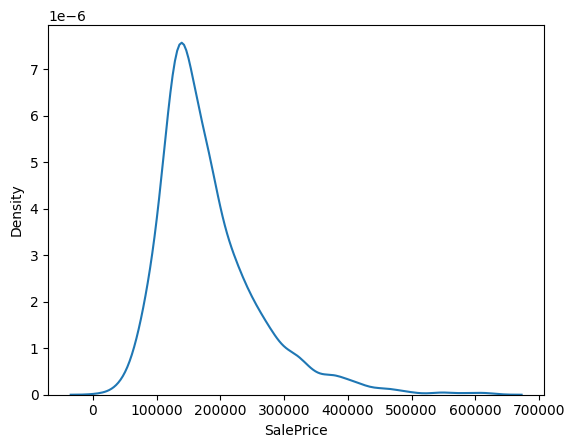

In [ ]:
sns.kdeplot(df["SalePrice"])  # Grafik simetrik yani veri dağılımları dengeli.

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_linear = linear_model.predict(X_test)
y_pred_linear

array([151792.74450553, 135963.34924813, 115087.24643875, 157744.59784791,
       202023.90473083, 149893.98122589, 144971.81765699, 135438.02262393,
       264281.19576675, 207984.93433686, 224706.37860453, 131367.62742287,
       137637.76802173, 328291.81343721, 149429.02608869, 247374.85433517,
       139209.41222776,  91907.61388761, 189883.33561792, 161164.55506939,
       183205.75759348, 204201.24648782, 153063.38206389, 197697.46718275,
       151123.90870268, 225786.39410263, 113288.19886705, 131583.60319377,
        38671.22077023, 136621.72878956, 145714.85195965, 153568.53335189,
       137558.05570161, 147107.82413797, 164306.80610894, 194693.3513729 ,
       233992.05066513, 212792.75779357,  82358.8383707 , 281440.90692205,
       113316.41273496, 211087.3618316 , 115786.39186983,  85223.08053858,
       149308.60379513, 190483.10306198, 291798.5768013 , 280427.7677929 ,
       174142.44236103, 211931.14345686, 163196.98405224, 167665.70544103,
       132755.31305905, 1

In [ ]:
linear_model.score(X_train,y_train)

0.8057888876911486

In [ ]:
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)

In [ ]:
print('Linear mae: ', linear_mae)
print('Linear mse: ', linear_mse)
print('Linear rmse: ', np.sqrt(linear_mse))

Linear mae:  25633.876012917946
Linear mse:  1318886472.5028746
Linear rmse:  36316.476598134825


In [ ]:
df['Overall Qual'] = df['Overall Qual'] ** 3
df["Gr Liv Area'"] = df["Gr Liv Area"] ** 2 # Küp ve karesini abartarak aldık.Yani polinom regresyon yaptık.
   # Böylece çizgi daha eğimli oluyor ve veri seti daha iyi ifade ediliyor.

X = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

poly_model = LinearRegression()

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)

print("Poly MAE: ",poly_mae)
print("Poly MSE: ",poly_mse)
print("Poly RMSE: ",np.sqrt(poly_mse))
print(poly_model.score(X,y))

Poly MAE:  21700.818600824452
Poly MSE:  993904118.189295
Poly RMSE:  31526.244911014935
0.8460513709793256


Ölçeklendirilmiş Polinomal Lineer Regresyon

In [ ]:
df=pd.read_csv("final_Emlak_limitli_sutun.csv")

In [ ]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)  # 2.dereceden polinominal özelliklere çerir

In [ ]:
poly_features = polynomial_converter.fit_transform(X)  # Çevirme işlemini yaptırıyoruz.

In [ ]:
poly_features.shape  # Satır-sütun

(2923, 27)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

In [ ]:
model = LinearRegression()  # Model nesnesini oluşturuyoruz.
model.fit(X_train,y_train)  # Modeli eğitiyoruz.

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)  # Tahmin verilerini oluşturuyoruz.

In [ ]:
model.score(X_test, y_test)

0.7758071132612541

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)  # 'X_train' ve 'X_test'i oluşturduğumuz modele göre dönüştürüyoruz.
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)  # Test verilerine göre hata oranları.

In [ ]:
MAE

25633.876012917946

In [ ]:
MSE

1318886472.5028746

In [ ]:
RMSE = np.sqrt(MSE)
print(RMSE)

36316.476598134825


In [ ]:
model.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-197.76216575144304